In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 高级处理-分组与聚合

In [3]:
color = pd.DataFrame(
    {
        "color": ["white", "red", "green", "red", "green"],
        "object": ["pen", "pencil", "pencil", "ashtray", "pen"],
        "price1": [5.56, 4.20, 1.30, 0.56, 2.75],
        "price2": [4.75, 4.12, 1.60, 0.75, 3.15],
    }
)
color

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


## groupby

### DataFrame分组,先分组再选择列,再计算

In [16]:
color.groupby(["color"])

In [7]:
color.groupby(["color"])["price1"]

In [8]:
color.groupby(["color"])["price1"].mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

### Series分组,先选择列,再分组,再计算

In [9]:
# 按照颜色分组,计算之后才有表格
color["price1"].groupby(color["color"]).mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

### as_index=False 新建索引 0 1 2

In [10]:
# 分组,要price1,再求平均值,计算之后才有表格
color.groupby(["color"], as_index=False)["price1"].mean()

,color,price1
0,green,2.025
1,red,2.380
2,white,5.560


## 星巴克零售店铺数据

### 数据获取

In [11]:
# 导入星巴克店的数据
starbucks = pd.read_csv("../data/starbucks/directory.csv")
starbucks[:5]

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


### 进行分组聚合

In [15]:
country_count = starbucks.groupby(["Country"]).count()
country_count.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Postcode,Phone Number,Timezone,Longitude,Latitude
Country,,,,,,,,,,,,
AD,1,1,1,1,1,1,1,1,1,1,1,1
AE,144,144,144,144,144,144,144,24,78,144,144,144
AR,108,108,108,108,108,108,108,100,29,108,108,108
AT,18,18,18,18,18,18,18,18,17,18,18,18
AU,22,22,22,22,22,22,22,22,0,22,22,22


### 画图显示结果

<AxesSubplot: xlabel='Country'>

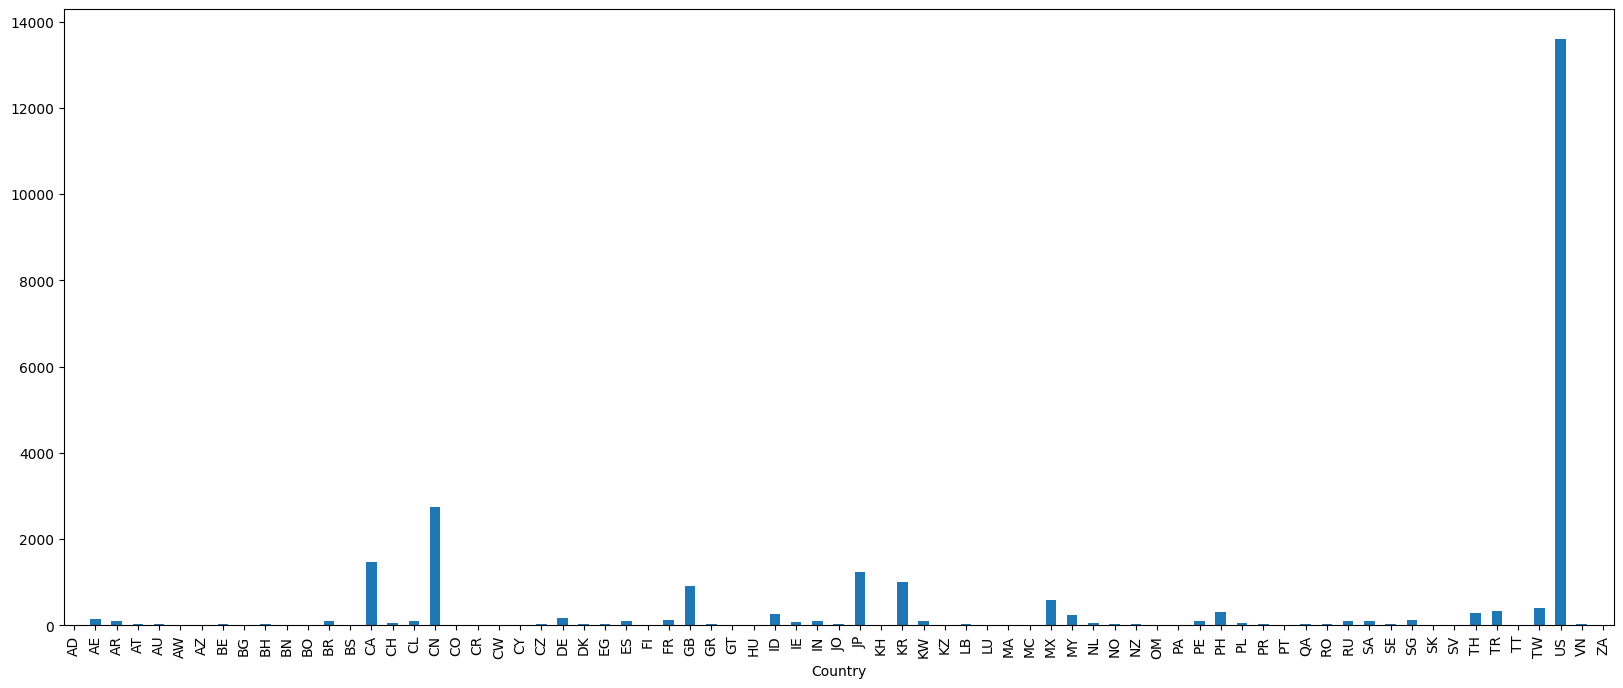

In [17]:
country_count["Brand"].plot(kind="bar", figsize=(20, 8))

In [18]:
# 假设我们加入省市一起进行分组
country_state_count = starbucks.groupby(["Country", "State/Province"]).count()
country_state_count

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
...                       ...           ...         ...             ...   
US      WV                 25            25          25              25   
        WY                 23            23          23              23   
VN      HN                  6             6           6               6   
        SG                 19            19          19              19   
ZA      GT                  3             3           3               3   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   
...                                ...   ...       ...           ...   
US      WV                          25    25        25            23   
        WY                          23    23        23            22   
VN      HN                           6     6         6             6   
        SG                          19    19        19            17   
ZA      GT                           3     3         3             2   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2  
...                          ...        ...       ...  
US      WV                    25         25        25  
        WY                    23         23        23  
VN      HN                     6          6         6  
        SG                    19         19        19  
ZA      GT                     3          3         3  

[545 rows x 11 columns]

<AxesSubplot: xlabel='Country,State/Province'>

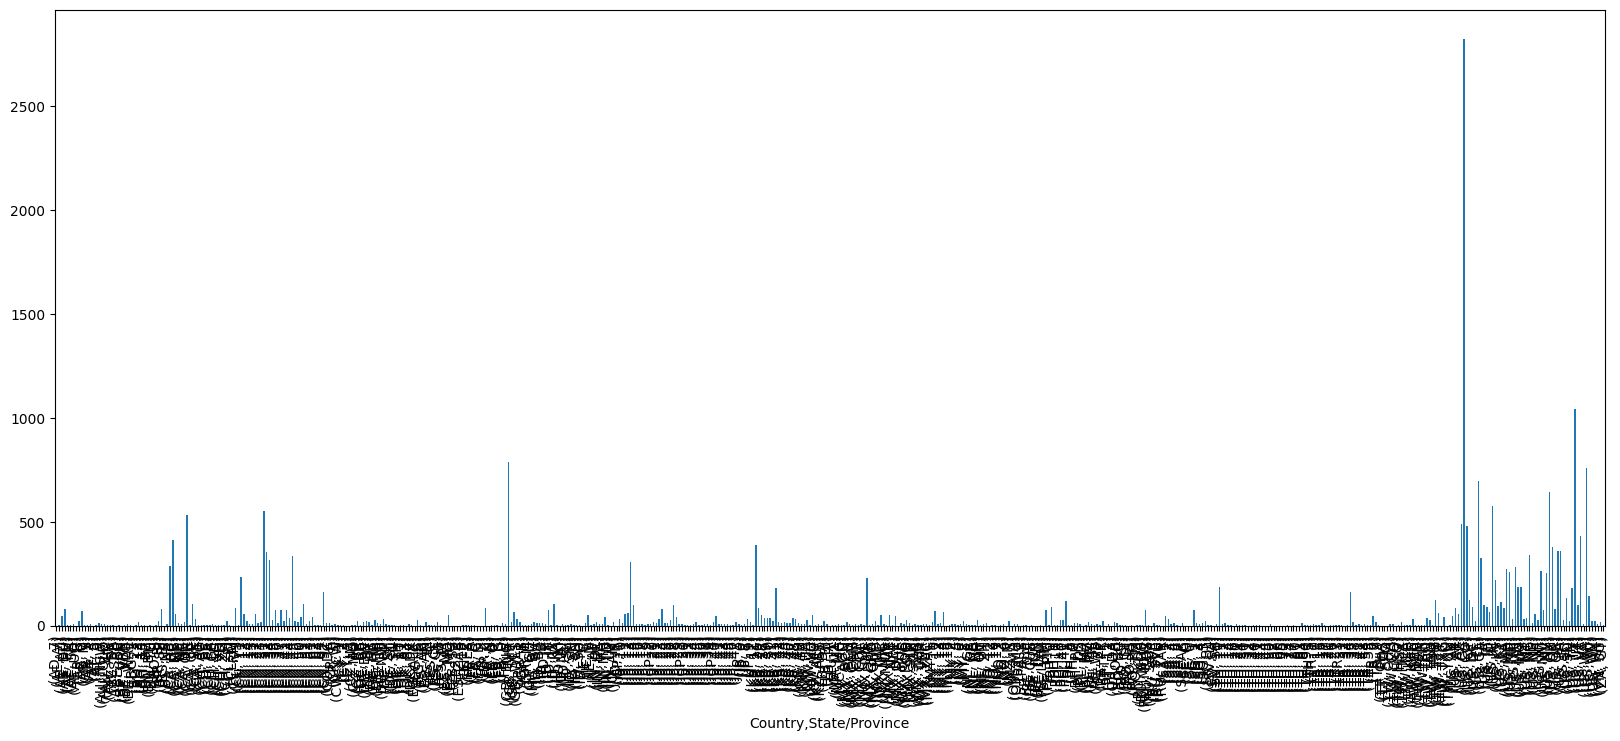

In [19]:
country_state_count["Brand"].plot(kind="bar", figsize=(20, 8))